In [468]:
import numpy as np

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)



<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

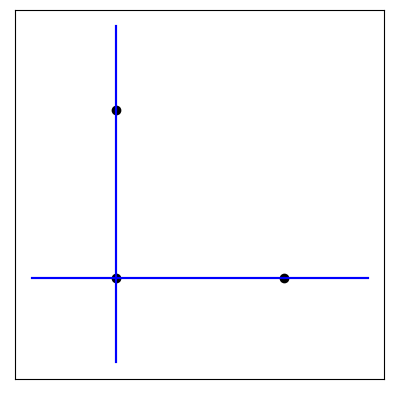

In [477]:
# Create an instance of the diagonally striped lattice
lat = lattice.dDiagonallyStripedLattice(N=2)
ham = hamiltonian.Model(N=4, kind='dDSL')
 
import matplotlib.pyplot as plt

#lat.plot_lattice();
lat.plot_nn();

In [478]:
k=np.linspace(0,np.pi, 100)

In [479]:
lat.nn

{(0, 1): {(0, 0): [(0, 1), (0, 0)]},
 (1, 0): {(0, 0): [(1, 0), (0, 0)]},
 (0, 0): {(1, 0): [(0, 0), (-1, 0)], (0, 1): [(0, 0), (0, -1)]}}

In [480]:
ham.mu

array([0., 0., 0., 0.])

In [481]:
ham.Hk(k[60], k[80])[1]

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

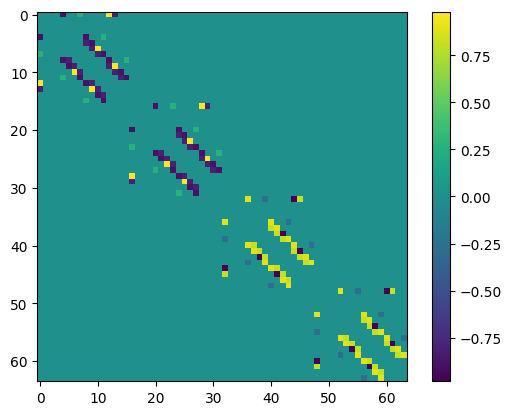

In [482]:

plt.imshow(np.real(ham.Hk(k[60], k[80])))
plt.colorbar()

In [483]:
energies=ham.solvHam(k,k)
k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = ham.solvHam(kx, ky)

np.shape(energies)
emax = np.amax(energies)
emax = emax+0.1*emax

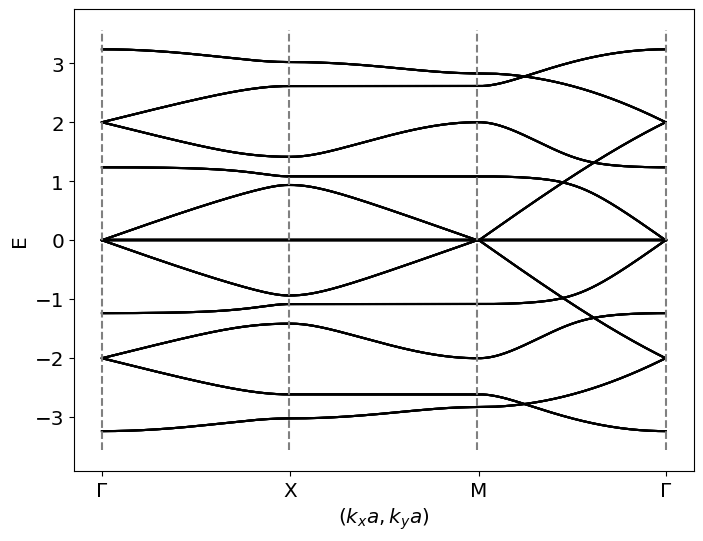

In [484]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')

plt.show()

In [485]:
np.shape(ham.Hk(k[22], k[22])[0])

(64,)

In [444]:
np.shape(energies)

(64, 300)

array([[-2.78508637e-16, -2.47646437e-16, -6.74693026e-16, ...,
        -2.90346731e-16, -2.36231470e-16, -2.78508637e-16],
       [-1.66318821e-16, -2.37402134e-16, -6.74693026e-16, ...,
        -2.90346731e-16, -8.22094435e-17, -1.66318821e-16],
       [-1.40332688e-16, -8.92734302e-17, -1.54121660e-16, ...,
        -2.47114222e-16,  2.18963610e-17, -1.40332688e-16],
       ...,
       [ 2.89168546e-01,  2.89164421e-01,  2.89152038e-01, ...,
         2.89057080e-01,  2.89140722e-01,  2.89168546e-01],
       [ 2.89168546e-01,  2.89164421e-01,  2.89152038e-01, ...,
         2.89057080e-01,  2.89140722e-01,  2.89168546e-01],
       [ 1.00000000e+00,  9.90835841e-01,  9.81664323e-01, ...,
         9.63136552e-01,  9.81623192e-01,  1.00000000e+00]])

In [300]:
len(lat.sites)

3

In [301]:
lat.sites

{(0, 0), (0, 1), (1, 0)}

In [302]:
d = {'A': 1, 'B':2}
d.items()

dict_items([('A', 1), ('B', 2)])